**Import necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Data Cleaning**

In [ ]:
#Check for null values
pd.isnull(df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Remove null values
df.dropna(inplace=True)

In [ ]:
#Describe function shows us the statistical values of the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [ ]:
#Survival rate = 0 - not survived, 1 - survived
df['Survived'].value_counts()

Survived
1    123
0     60
Name: count, dtype: int64

**Exploratory Data Analysis**

<ipython-input-10-154a5d213392>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.countplot(x= df['Survived'], hue=df['Pclass'], color='red')


<Axes: xlabel='Survived', ylabel='count'>

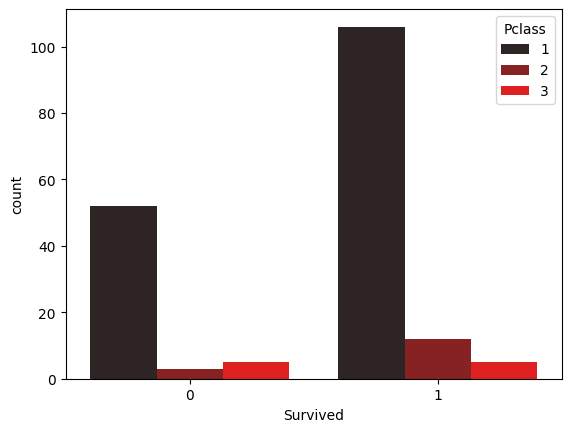

In [ ]:
#Lets visualize the count of survivals w.r.t Pclass
sns.countplot(x= df['Survived'], hue=df['Pclass'], color='red')

In [ ]:
df['Sex']

1      female
3      female
6        male
10     female
11     female
        ...  
871    female
872      male
879    female
887    female
889      male
Name: Sex, Length: 183, dtype: object

<Axes: xlabel='Sex', ylabel='count'>

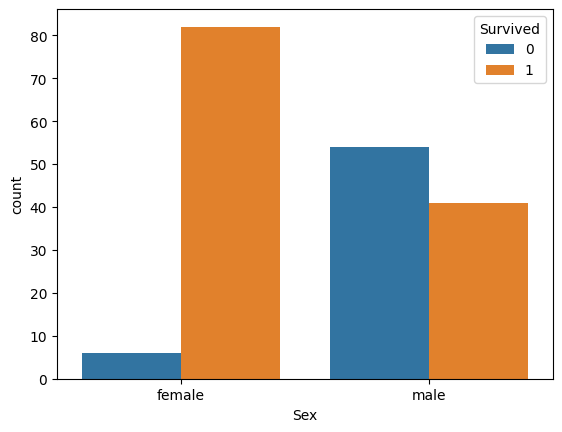

In [ ]:
sns.countplot(x=df['Sex'], hue=df['Survived'])

In [ ]:
#Look at survical rate by sex
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.931818
male,0.431579


In [ ]:
#We have converted the sex column in numeric values using 'label encoder' function for better analysis
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['Sex'] = labelencoder.fit_transform(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,S


<Axes: xlabel='Sex', ylabel='count'>

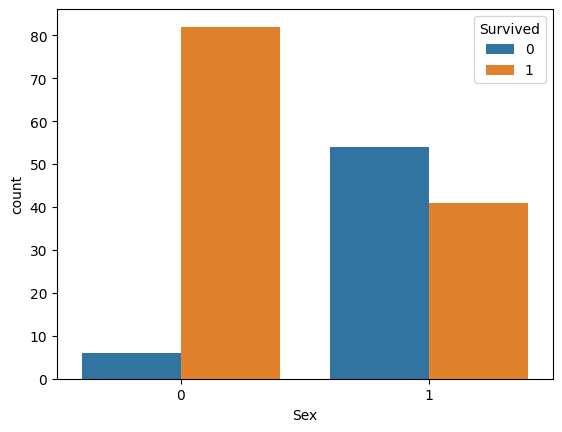

In [ ]:
#After adding the label encoder we can see there is no change in our graph, So, by this information we can say that, our analysis is correct
sns.countplot(x=df['Sex'], hue=df['Survived'])

**Model Training**

In [ ]:

#Hence we can say that the columns 'Sex' and 'Pclass' are enough for analysis
X = df[['Sex', 'Pclass']]
Y = df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(X_train, Y_train)

LogisticRegression(random_state=0)

**Model Prediction**

In [ ]:
pred = print(log.predict(X_test))

[1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1]


In [ ]:
print(Y_test)

473    1
110    0
195    1
492    0
835    1
806    0
27     0
681    1
319    1
366    1
21     1
550    1
871    1
632    1
781    1
717    1
581    1
520    1
394    1
742    1
341    1
305    1
218    1
707    1
11     1
332    0
453    1
879    1
262    0
452    0
540    1
327    1
151    1
318    1
820    1
759    1
52     1
Name: Survived, dtype: int64


In [ ]:
import warnings
warnings.filterwarnings('ignore')

res= log.predict([[1,0]]) #Here 1 is Pclass and 0 is female

if(res==0):
  print("Not Survived")
else:
  print("Survived")

Survived
